In [1]:
import fml

In [2]:
import pandas as pd

In [3]:
avocado = pd.read_csv("/home/andy/datasets/avocado.csv", parse_dates=['Date'])
telco_churn = pd.read_csv("/home/andy/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#restaurant = pd.read_csv("/home/andy/datasets/restaurant-and-market-health-violations.csv")
titanic = pd.read_csv("fml/tests/titanic.csv")
ames = pd.read_excel("/home/andy/datasets/AmesHousing.xls")
cars = pd.read_excel("/home/andy/datasets/2018 FE Guide for DOE-release dates before 1-24-2018-no-sales-1-23-2018public.xlsx")
accidents = pd.read_csv("/home/andy/datasets/Acc.csv")
violations = pd.read_csv("/home/andy/datasets/Traffic_Violations.csv")
adult = pd.read_csv("http://github.com/amueller/ml-training-advanced/raw/master/notebooks/data/adult.csv")

# individual_donations = pd.read_csv("/home/andy/datasets/itcont.txt")
# FIXME add rent stuff from first year
# FIXME add stuff from Gael's papers

/home/andy/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
from fml.preprocessing import detect_types_dataframe

In [4]:
cars = pd.read_excel("/home/andy/datasets/2018 FE Guide for DOE-release dates before 1-24-2018-no-sales-1-23-2018public.xlsx")

types = detect_types_dataframe(cars)

In [6]:
cars.columns[types.continuous]

Index(['Carline', 'Eng Displ', 'City Unadj FE - Conventional Fuel',
       'Air Aspiration Method Desc', 'Trans', '# Gears',
       'Lockup Torque Converter', 'Trans Creeper Gear', 'Drive Sys',
       'Max Biodiesel %', 'Fuel Usage  - Conventional Fuel',
       'Fuel Usage Desc - Conventional Fuel',
       'Hwy2 Fuel FE (Guide) - Alternative Fuel',
       'Comb2 Fuel FE (Guide) - Alternative Fuel',
       'City2 Unadj FE - Alternative Fuel',
       'Comb2 Unadj FE - Alternative Fuel',
       'City2 Unrd Adj FE - Alternative Fuel',
       'Hwy2 Unrd Adj FE - Alternative Fuel',
       'Cmb2 Unrd Adj FE - Alternative Fuel',
       ' Range2 - Alt Fuel Model Typ Driving Range - Alternative Fuel',
       ' Fuel2 Usage - Alternative Fuel',
       ' Fuel2 Usage Desc - Alternative Fuel', 'Fuel2 Unit - Alternative Fuel',
       'City CO2 Rounded Adjusted - Fuel2', 'Hwy CO2 Rounded Adjusted - Fuel2',
       'Comb CO2 Rounded Adjusted - Fuel2',
       'Fuel2 EPA Calculated Annual Fuel Cost - Alter

In [6]:
bla = cars.loc[:, types.low_card_int]

In [7]:
y = bla['Comb FE (Guide) - Conventional Fuel']

In [53]:
y.mean()
poi = scipy.stats.poisson(y.mean())

In [57]:
poi.dist.

In [103]:
def fit_poisson(values):
    mean = np.mean(values)
    p = scipy.stats.poisson(mean).logpmf(values).mean()
    return p

def fit_binomial(values):
    m = np.max(x)
    p = y.mean() / m
    bn = scipy.stats.binom(m, p)
    return bn.logpmf(values).mean()

In [69]:
scipy.stats.poisson(3).logpmf(y).mean()

-30.697407235919073

In [68]:
poi.logpmf(y).mean()

-3.128128725932491

/home/andy/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.00165563, 0.00413907, 0.0057947 , 0.01241722, 0.01572848,
        0.0281457 , 0.04635762, 0.06788079, 0.08029801, 0.06374172,
        0.07119205, 0.0852649 , 0.08195364, 0.07201987, 0.0736755 ,
        0.04801325, 0.05298013, 0.03890728, 0.03062914, 0.02152318,
        0.01903974, 0.02566225, 0.0115894 , 0.0115894 , 0.00827815,
        0.00413907, 0.00124172, 0.00082781, 0.00165563, 0.00165563,
        0.00027594, 0.00082781, 0.00082781, 0.00041391, 0.00055188,
        0.00082781, 0.00082781]),
 array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
        28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 43, 46, 49, 50,
        52, 55, 56, 58]),
 <a list of 37 Patch objects>)

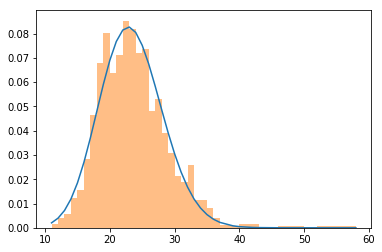

In [94]:
x = np.unique(y)
plt.plot(x, poi.pmf(x))
plt.hist(y, alpha=.5, bins=np.unique(y), normed=True)

In [104]:
fit_binomial(y)

-3.3900283537733347

In [105]:
fit_poisson(y)

-3.128128725932491

/home/andy/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.00165563, 0.00413907, 0.0057947 , 0.01241722, 0.01572848,
        0.0281457 , 0.04635762, 0.06788079, 0.08029801, 0.06374172,
        0.07119205, 0.0852649 , 0.08195364, 0.07201987, 0.0736755 ,
        0.04801325, 0.05298013, 0.03890728, 0.03062914, 0.02152318,
        0.01903974, 0.02566225, 0.0115894 , 0.0115894 , 0.00827815,
        0.00413907, 0.00124172, 0.00082781, 0.00165563, 0.00165563,
        0.00027594, 0.00082781, 0.00082781, 0.00041391, 0.00055188,
        0.00082781, 0.00082781]),
 array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
        28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 43, 46, 49, 50,
        52, 55, 56, 58]),
 <a list of 37 Patch objects>)

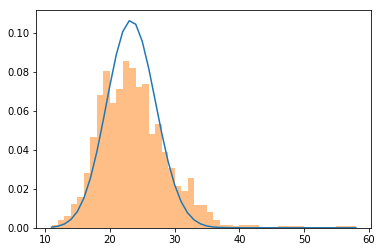

In [93]:
m = np.max(x)
p = y.mean() / m
bn = scipy.stats.binom(m, p)
plt.plot(x, bn.pmf(x))
plt.hist(y, alpha=.5, bins=np.unique(y), normed=True)

In [97]:
perm

array([12, 15,  3, 14,  1,  4, 10, 11,  0, 13,  2,  8,  5,  7,  9,  6])

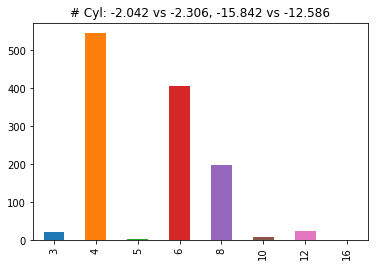

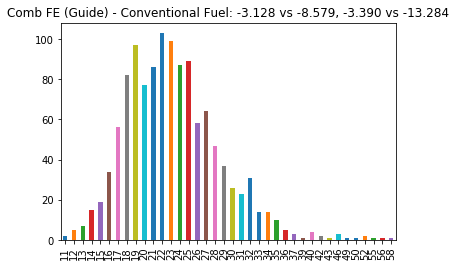

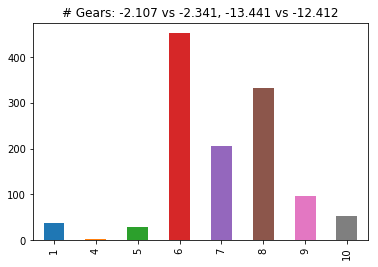

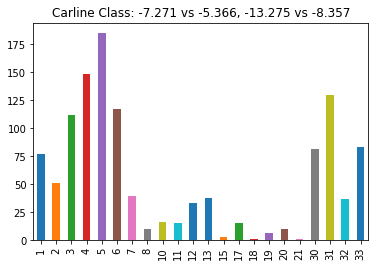

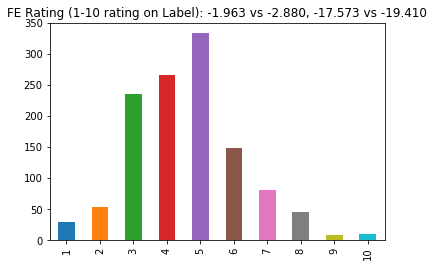

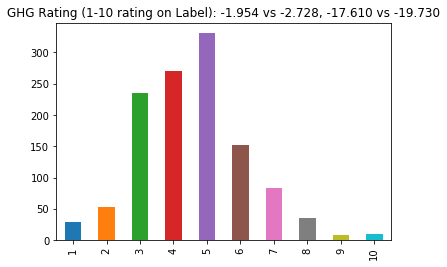

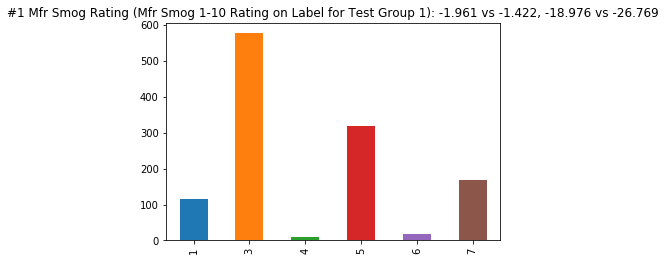

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
for c in bla.columns:
    col = bla[c]
    perm = np.random.permutation(col.max() + 1)
    plt.figure()
    col.value_counts().sort_index().plot.bar()
    plt.gca().set_title("{}: {:.3f} vs {:.3f}, {:.3f} vs {:.3f}".format(c, fit_poisson(col), fit_poisson(perm[col]), fit_binomial(col), fit_binomial(perm[col])))

In [10]:
cars['Comb FE (Guide) - Conventional Fuel'].dtype

dtype('int64')

In [9]:
types.loc['Comb FE (Guide) - Conventional Fuel']

continuous      False
dirty_float     False
low_card_int     True
categorical     False
date            False
free_string     False
useless         False
Name: Comb FE (Guide) - Conventional Fuel, dtype: bool

regression


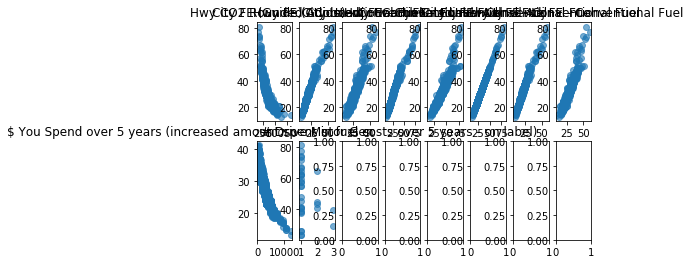

In [5]:
from fml.plotting import plot_supervised
%matplotlib inline
plot_supervised(cars, 'Comb Unadj FE - Conventional Fuel')

In [9]:
types.loc['#4 Smog Rating Test Group']

continuous      False
dirty_float     False
low_card_int    False
categorical     False
date            False
free_string     False
useless          True
Name: #4 Smog Rating Test Group, dtype: bool

In [10]:
grr = cars.loc[:, types.continuous]

In [11]:
grr.nunique()

Index (Model Type Index)                                                                                      469
Eng Displ                                                                                                      42
City FE (Guide) - Conventional Fuel                                                                            43
Hwy FE (Guide) - Conventional Fuel                                                                             42
City Unadj FE - Conventional Fuel                                                                             643
Hwy Unadj FE - Conventional Fuel                                                                              696
Comb Unadj FE - Conventional Fuel                                                                             955
City Unrd Adj FE - Conventional Fuel                                                                          677
Hwy Unrd Adj FE - Conventional Fuel                                                     

In [12]:
types.index[types.continuous]

Index(['# Batteries', '# Drive Motor Gen',
       '#2 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 2)',
       '$ You Save over 5 years (amount saved in fuel costs over 5 years - on label) ',
       '$ You Spend over 5 years (increased amount spent in fuel costs over 5 years - on label) ',
       '2Dr Lugg Vol', '2Dr Pass Vol', '4Dr Lugg Vol', '4Dr Pass Vol',
       'Annual Fuel1 Cost - Conventional Fuel',
       'Batt Energy Capacity (Amp-hrs)', 'Batt Specific Energy (Watt-hr/kg)',
       'City CO2 Rounded Adjusted', 'City CO2 Rounded Adjusted - Fuel2',
       'City FE (Guide) - Conventional Fuel',
       'City Unadj FE - Conventional Fuel',
       'City Unrd Adj FE - Conventional Fuel',
       'City2 FE (Guide) - Alternative Fuel',
       'City2 Unadj FE - Alternative Fuel',
       'City2 Unrd Adj FE - Alternative Fuel',
       'Cmb2 Unrd Adj FE - Alternative Fuel',
       'Comb CO2 Rounded Adjusted (as shown on FE Label)',
       'Comb CO2 Rounded Adjusted - Fuel2',

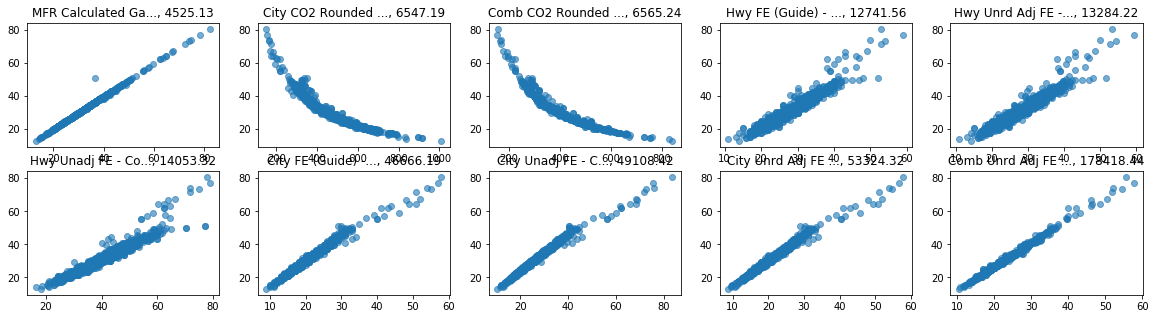

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_regression
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.constrained_layout.use'] = False

def _shortname(some_string):
    if len(some_string) > 20:
        return some_string[:17] + "..."
    else:
        return some_string

X = cars.loc[:, types.continuous]
target = 'Comb Unadj FE - Conventional Fuel'
features = X.drop(target, axis=1)
target = X[target]

if X.shape[1] > 20:
    # too many features, show just top 10
    show_top = 10
else:
    show_top = X.shape[1]
# Several weird things: why are constant columns in features?
# why does simple imputer drop columns
# why are nan columns important?
features_imp = SimpleImputer().fit_transform(features)
f, p = f_regression(features_imp, target)
top_k = np.argsort(f)[-show_top:]
# we could do better lol
n_cols = 5
fig, axes = plt.subplots(int(np.ceil(show_top / n_cols)), n_cols, figsize=(20, 5))
for col, ax in zip(top_k, axes.ravel()):
    ax.plot(features.iloc[:, col], target, 'o', alpha=.6)
    ax.set_title("{}, {:.2f}".format(_shortname(features.columns[col]), f[col]))


In [7]:
np.argsort(f)

array([10, 13, 14, 11, 32, 15, 39, 34, 36, 38, 29, 28, 27, 31, 30, 19, 18,
       25, 22, 24, 21, 20, 26, 23, 33,  9, 35, 12,  0, 40, 41,  1, 43, 17,
       16, 37, 42, 44,  3,  7,  5,  2,  4,  6,  8])

In [8]:
np.argsort(p)

array([44,  2,  3,  4,  5,  6,  7,  8, 42, 37, 43, 17, 16,  1, 41, 40,  0,
       12, 35,  9, 33, 23, 26, 20, 21, 24, 22, 25, 18, 19, 30, 31, 27, 28,
       29, 38, 36, 34, 39, 15, 32, 11, 14, 13, 10])

In [9]:
np.sort(p)

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 2.14268906e-209, 2.51593458e-076, 7.47517743e-042,
       7.01490266e-018, 2.72100942e-015, 1.04419080e-007, 5.63036910e-005,
       9.06207177e-004, 1.20109349e-003, 1.22121397e-003, 1.24116609e-003,
       1.42204637e-003, 1.46310342e-003, 1.50301902e-003, 1.51858970e-003,
       1.57630651e-003, 1.59405934e-003, 1.62963711e-003, 1.70230419e-003,
       1.70230419e-003, 1.76498627e-003, 2.02560288e-003, 2.48382660e-003,
       2.79483791e-003, 2.93060293e-003, 4.24458889e-003, 1.33435428e-002,
       5.65884893e-001, 6.84267581e-001, 7.45886217e-001, 7.92762452e-001,
       8.66329403e-001])

In [10]:
np.sort(f)

array([2.83446193e-02, 6.90550895e-02, 1.05068483e-01, 1.65441359e-01,
       3.29798440e-01, 6.14110398e+00, 8.20729074e+00, 8.88642577e+00,
       8.97371286e+00, 9.19110868e+00, 9.56789116e+00, 9.82302546e+00,
       9.89009961e+00, 9.89009961e+00, 9.97106863e+00, 1.00120569e+01,
       1.00328580e+01, 1.01021655e+01, 1.01213210e+01, 1.01713609e+01,
       1.02242974e+01, 1.04776102e+01, 1.05078166e+01, 1.05387886e+01,
       1.10650335e+01, 1.63395073e+01, 2.86366905e+01, 6.41314384e+01,
       7.65758702e+01, 1.98537854e+02, 3.95413124e+02, 1.45410027e+03,
       3.96360853e+03, 4.32824109e+03, 4.32824109e+03, 4.52513366e+03,
       6.54718944e+03, 6.56524149e+03, 1.27415628e+04, 1.32842243e+04,
       1.40533230e+04, 4.66661892e+04, 4.91084169e+04, 5.33243179e+04,
       1.78418443e+05])

In [28]:
features[:, 44]

array([420., 317., 531., ..., 614., 365., 394.])

In [13]:
types.sum()

continuous      87
dirty_float      0
low_card_int     7
categorical     43
date             1
free_string      7
useless         17
dtype: int64

In [24]:
detect_types_dataframe(telco_churn).T.idxmax()

Churn               categorical
Contract            categorical
Dependents          categorical
DeviceProtection    categorical
InternetService     categorical
MonthlyCharges       continuous
MultipleLines       categorical
OnlineBackup        categorical
OnlineSecurity      categorical
PaperlessBilling    categorical
Partner             categorical
PaymentMethod       categorical
PhoneService        categorical
SeniorCitizen       categorical
StreamingMovies     categorical
StreamingTV         categorical
TechSupport         categorical
TotalCharges        dirty_float
customerID          free_string
gender              categorical
tenure               continuous
dtype: object

In [9]:
detect_types_dataframe(avocado).T.idxmax()

4046              continuous
4225              continuous
4770              continuous
AveragePrice      continuous
Date                    date
Large Bags        continuous
Small Bags        continuous
Total Bags        continuous
Total Volume      continuous
Unnamed: 0      low_card_int
XLarge Bags       continuous
region               useless
type             categorical
year            low_card_int
dtype: object

In [4]:
from fml.preprocessing import FriendlyPreprocessor

In [5]:
# sp = FriendlyPreprocessor(verbose=10)
# sp.fit(avocado)

In [6]:
y = telco_churn.Churn
X = telco_churn.drop("Churn", axis=1)

In [7]:
y.value_counts() / y.size

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [8]:
from fml.models import FriendlyClassifier

In [9]:
# %%prun -s cumulative -l 100 -D test.prof
fc = FriendlyClassifier().fit(X, y)

Detected feature types:
1 float, 2 int, 17 object, 0 date, 0 other
Interpreted as:
3 continuous, 15 categorical, 0 date, 1 dirty float, 1 dropped
DummyClassifier(strategy='prior')
accuracy: 0.7346    average_precision: 0.2654    recall_macro: 0.5000    roc_auc: 0.5000    
new best: 0.5000
GaussianNB()
accuracy: 0.6320    average_precision: 0.6081    recall_macro: 0.7169    roc_auc: 0.8182    
new best: 0.7169
MultinomialNB()
accuracy: 0.7177    average_precision: 0.6067    recall_macro: 0.7481    roc_auc: 0.8174    
new best: 0.7481
DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.6544    average_precision: 0.4087    recall_macro: 0.7282    roc_auc: 0.7282    
DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.7238    average_precision: 0.6105    recall_macro: 0.7510    roc_auc: 0.8293    
new best: 0.7510
DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0.01)
accuracy: 0.7233    average_precision: 0.4837    recall_macr

In [9]:
adult = pd.read_csv("http://github.com/amueller/ml-training-advanced/raw/master/notebooks/data/adult.csv")

In [10]:
# from sklearn.datasets import fetch_openml
# adult = fetch_openml("adult-census")
# adult_df = pd.DataFrame(adult.data, columns=adult.feature_names)

In [11]:
y = adult.income
X = adult.drop("income", axis=1)

In [12]:
X.columns

Index(['Unnamed: 0', 'age', 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [17]:
X.shape

(32561, 14)

In [20]:
from fml.preprocessing import detect_types_dataframe
detect_types_dataframe(X)

,continuous,categorical,date,dirty_float,useless
Unnamed: 0,True,False,False,False,False
age,True,True,False,False,False
capital-gain,True,True,False,False,False
capital-loss,True,True,False,False,False
education,False,True,False,False,False
education-num,True,True,False,False,False
gender,False,True,False,False,False
hours-per-week,True,True,False,False,False
marital-status,False,True,False,False,False
native-country,False,True,False,False,False


In [21]:
n_values = X.apply(lambda x: x.nunique())
n_values

Unnamed: 0        32561
age                  73
workclass             9
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
gender                2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
dtype: int64

In [22]:
fc = FriendlyClassifier().fit(X, y)

Detected feature types:
0 float, 6 int, 8 object, 0 date, 0 other
Interpreted as:
6 continuous, 13 categorical, 0 date, 0 dirty float, 0 dropped
DummyClassifier(strategy='prior')
accuracy: 0.7592    average_precision: 0.2408    recall_macro: 0.5000    roc_auc: 0.5000    
new best: 0.5000


TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [ ]:
from fml.preprocessing import detect_types_dataframe

In [ ]:
asdf = detect_types_dataframe(X, verbose=10)

In [16]:
asdf.categorical

Contract             True
Dependents           True
DeviceProtection     True
InternetService      True
MonthlyCharges      False
MultipleLines        True
OnlineBackup         True
OnlineSecurity       True
PaperlessBilling     True
Partner              True
PaymentMethod        True
PhoneService         True
SeniorCitizen       False
StreamingMovies      True
StreamingTV          True
TechSupport          True
TotalCharges        False
customerID          False
gender               True
tenure               True
Name: categorical, dtype: bool

In [20]:
"".join("{}: {} ".format(a, b) for a, b in asdf.categorical.items())

'Contract: True Dependents: True DeviceProtection: True InternetService: True MonthlyCharges: False MultipleLines: True OnlineBackup: True OnlineSecurity: True PaperlessBilling: True Partner: True PaymentMethod: True PhoneService: True SeniorCitizen: False StreamingMovies: True StreamingTV: True TechSupport: True TotalCharges: False customerID: False gender: True tenure: True '

In [15]:
X_cleanish.shape

(7043, 119)

In [16]:
fp = FriendlyPreprocessor()
fp.fit_transform(X_cleanish).shape

(7043, 192)

In [18]:
%%prun -s cumulative -l 100 -D test.prof
X_cleanish = safe_cleanup(X, onehot=True)
fc = FriendlyClassifier().fit(X_cleanish, y)

DummyClassifier(constant=None, random_state=None, strategy='prior')
fit_time                   0.004455
score_time                 0.010412
test_accuracy              0.734630
train_accuracy             0.734630
test_average_precision     0.265370
train_average_precision    0.265370
test_roc_auc               0.500000
train_roc_auc              0.500000
test_precision_macro       0.367315
train_precision_macro      0.367315
dtype: float64
GaussianNB(priors=None, var_smoothing=1e-09)
fit_time                   0.098654
score_time                 0.050067
test_accuracy              0.596049
train_accuracy             0.610500
test_average_precision     0.420463
train_average_precision    0.439988
test_roc_auc               0.724284
train_roc_auc              0.747796
test_precision_macro       0.642855
train_precision_macro      0.656280
dtype: float64
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
fit_time                   0.100408
score_time                 0.044273
test_a

         1538259 function calls (1514676 primitive calls) in 6.158 seconds

   Ordered by: cumulative time
   List reduced from 1420 to 100 due to restriction <100>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    6.158    6.158 {built-in method builtins.exec}
        1    0.000    0.000    6.157    6.157 <string>:2(<module>)
        1    0.000    0.000    5.885    5.885 models.py:25(fit)
        5    0.000    0.000    5.845    1.169 models.py:65(_evaluate_one)
        5    0.000    0.000    5.835    1.167 _validation.py:40(cross_validate)
    205/5    0.009    0.000    5.821    1.164 parallel.py:932(__call__)
   630/30    0.005    0.000    5.820    0.194 parallel.py:801(dispatch_one_batch)
   425/25    0.004    0.000    5.757    0.230 parallel.py:764(_dispatch)
   425/25    0.001    0.000    5.757    0.230 _parallel_backends.py:180(apply_async)
   425/25    0.001    0.000    5.757    0.230 _parallel_backends.py:542(__init__)
   42